In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

data = pd.read_csv("/content/faithful.csv")
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


1. a)
# Scatter plot of the Old Geyser dataset

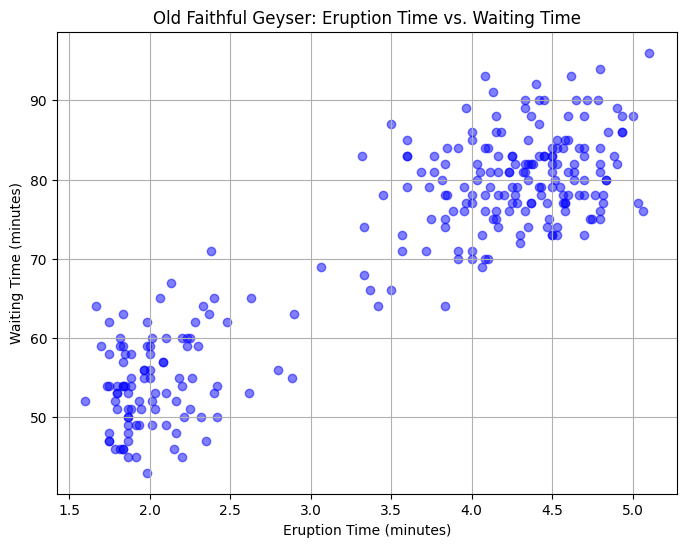

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data['eruptions'], data['waiting'], c='blue', alpha=0.5)
plt.title("Old Faithful Geyser: Eruption Time vs. Waiting Time")
plt.xlabel("Eruption Time (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.grid(True)
plt.show()

1. b) Based on the scatter plot, we can see two distinctive clusters.

1.c)

# Hierarchical Clustering:

In this clustering types, we start with individual points as clusters:

Initially, each data point is considered its own cluster. If there are n data points, we will have n initial clusters, each containing a single data point.

- Compute the distance matrix: Calculate the pairwise distances between all the data points. Typically, Euclidean distance is used, but other distance measures can also be applied depending on the problem.

- Merge the closest clusters: Identify the two clusters that are closest to each other based on the distance matrix. The measure of "closeness" can be defined using methods such as single linkage, complete linkage, or average linkage. These two clusters are then merged into a single cluster.

- Update the distance matrix: After merging two clusters, the distance matrix needs to be updated. The distance between the new merged cluster and the other clusters is calculated. The exact method for updating the distance depends on the linkage criterion.

- Repeat the process: Continue merging the closest clusters and updating the distance matrix until only one cluster remains. The number of clusters can be controlled by specifying a threshold or by cutting the tree at a certain level.

- Create a dendrogram: A dendrogram is a tree-like diagram that visually represents the hierarchy of clusters. The height of the branches in the dendrogram corresponds to the distance between merged clusters. The point at which two clusters are merged shows their distance from each other.

So, based on the scatter plots of Old faithful geyser, we can say that Hierarchial clustering could be one of the best method for clustering.

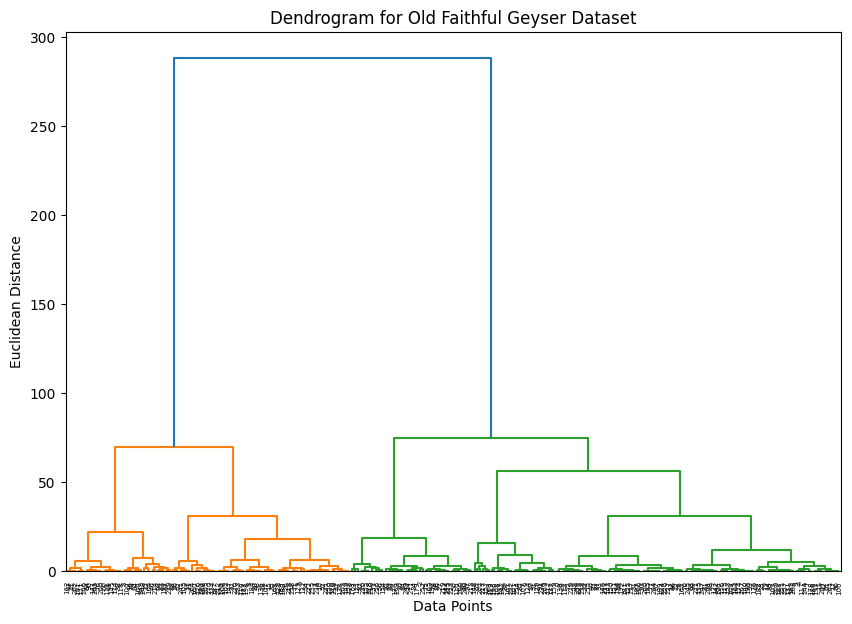

   eruptions  waiting  cluster
0      3.600       79        2
1      1.800       54        1
2      3.333       74        2
3      2.283       62        1
4      4.533       85        2


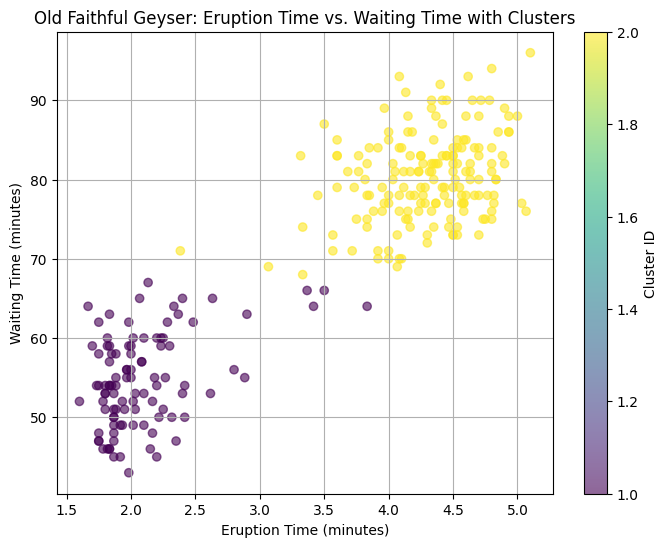

In [ ]:
from scipy.cluster.hierarchy import fcluster

Z = linkage(data[['eruptions', 'waiting']], method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram for Old Faithful Geyser Dataset")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

clusters = fcluster(Z, t=150, criterion='distance')

data['cluster'] = clusters
print(data.head())

plt.figure(figsize=(8,6))
plt.scatter(data['eruptions'], data['waiting'], c=data['cluster'], cmap='viridis', alpha=0.6)
plt.title("Old Faithful Geyser: Eruption Time vs. Waiting Time with Clusters")
plt.xlabel("Eruption Time (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.grid(True)
plt.colorbar(label="Cluster ID")
plt.show()

2.a - c)

# K-means clustering, scatter plots and objective function.

Converged in 5 iterations.


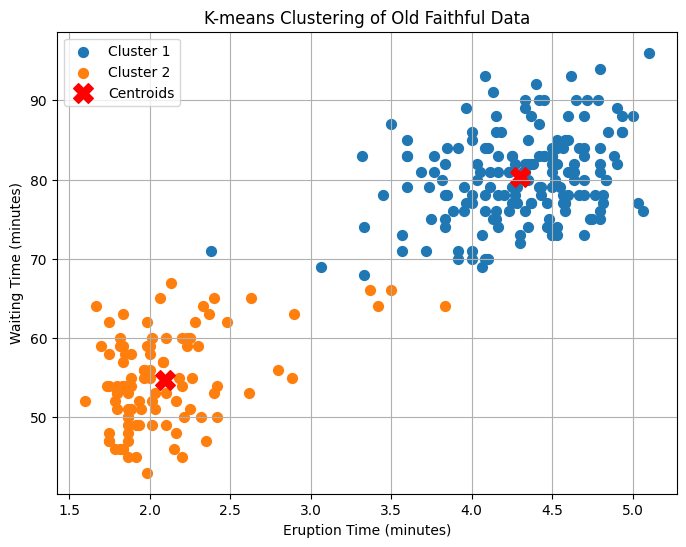

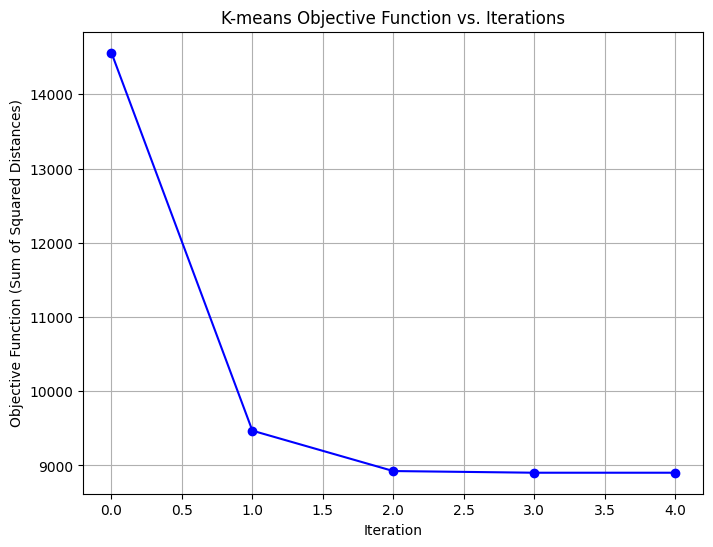

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = X[np.random.choice(X.shape[0], size=k, replace=False)]

    objective_values = []

    for i in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        objective_value = np.sum((X - new_centroids[labels]) ** 2)
        objective_values.append(objective_value)

        if np.allclose(centroids, new_centroids, atol=tol):
            print(f"Converged in {i+1} iterations.")
            break

        centroids = new_centroids

    return centroids, labels, objective_values

X = data[['eruptions', 'waiting']].values

k = 2
centroids, labels, objective_values = kmeans(X, k)

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f"Cluster {i+1}", s=50)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200, label="Centroids")
plt.title("K-means Clustering of Old Faithful Data")
plt.xlabel("Eruption Time (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(objective_values, marker='o', linestyle='-', color='blue')
plt.title("K-means Objective Function vs. Iterations")
plt.xlabel("Iteration")
plt.ylabel("Objective Function (Sum of Squared Distances)")
plt.grid(True)
plt.show()



2. d)

Yes, K-Means managed to find the two clusters.